# 人脸关键点检测及节点数据细节

In [2]:
import cv2
import numpy as np
import mediapipe as mp
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

In [4]:
# 导入人脸关键点检测模型
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    refine_landmarks=True,
    max_num_faces=5,# 最大人脸数量
    min_detection_confidence=0.5, 
    min_tracking_confidence=0.5
)
# 导入可视化函数和可视化样式
mp_drawing = mp.solutions.drawing_utils # 画关键点
drawing_spec = mp_drawing.DrawingSpec(
    thickness=3,# 线宽 
    circle_radius=5,# 点半径
    color=(223,155,6)
)

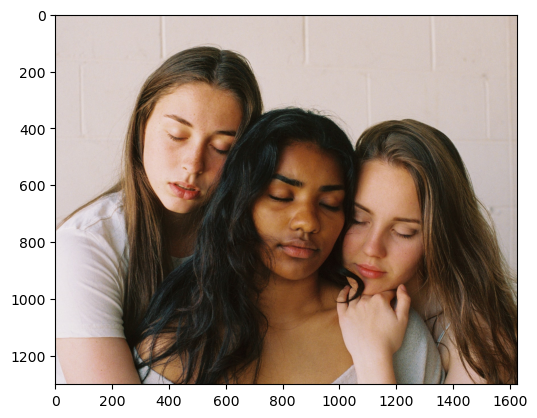

In [13]:
# 读取图像
img = cv2.imread('../images/A-0.jpeg')
look_img(img)

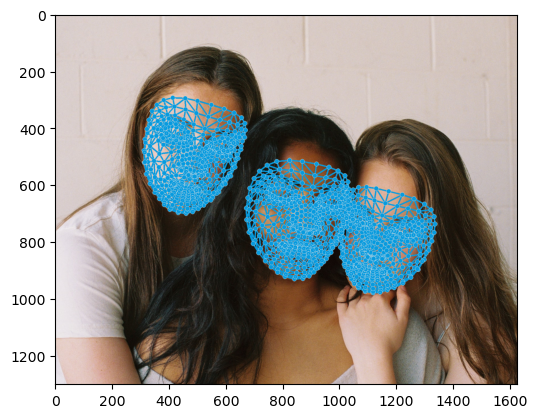

In [14]:
# 将BGR图像转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 将RGB图像输入模型，获取预测结果
results = face_mesh.process(img_RGB)

if results.multi_face_landmarks: # 判断是否检测到人脸
    for face_landmarks in results.multi_face_landmarks:# 遍历每一张人脸
        mp_drawing.draw_landmarks(
            image=img,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=drawing_spec,
            connection_drawing_spec=drawing_spec
        )
else:
    print('No face detected!')
    
look_img(img)

In [15]:
# 查看脸轮廓关键点之间的链接关系
mp_face_mesh.FACEMESH_CONTOURS

frozenset({(0, 267),
           (7, 163),
           (10, 338),
           (13, 312),
           (14, 317),
           (17, 314),
           (21, 54),
           (33, 7),
           (33, 246),
           (37, 0),
           (39, 37),
           (40, 39),
           (46, 53),
           (52, 65),
           (53, 52),
           (54, 103),
           (58, 132),
           (61, 146),
           (61, 185),
           (63, 105),
           (65, 55),
           (66, 107),
           (67, 109),
           (70, 63),
           (78, 95),
           (78, 191),
           (80, 81),
           (81, 82),
           (82, 13),
           (84, 17),
           (87, 14),
           (88, 178),
           (91, 181),
           (93, 234),
           (95, 88),
           (103, 67),
           (105, 66),
           (109, 10),
           (127, 162),
           (132, 93),
           (136, 172),
           (144, 145),
           (145, 153),
           (146, 91),
           (148, 176),
           (149, 150),
   

In [16]:
# 查看人脸的所有关键点坐标
# 注意：这是一个很奇怪的数据结构
# for face_landmarks in results.multi_face_landmarks:
#     print(face_landmarks.landmark)
    
results.multi_face_landmarks

[landmark {
   x: 0.285185814
   y: 0.45976302
   z: -0.0142343119
 }
 landmark {
   x: 0.298652261
   y: 0.434520364
   z: -0.0435112
 }
 landmark {
   x: 0.294373035
   y: 0.439196646
   z: -0.0188308228
 }
 landmark {
   x: 0.299717814
   y: 0.390233546
   z: -0.040915858
 }
 landmark {
   x: 0.301681846
   y: 0.423893481
   z: -0.0482866839
 }
 landmark {
   x: 0.305155516
   y: 0.407055587
   z: -0.0475714803
 }
 landmark {
   x: 0.313071668
   y: 0.361647367
   z: -0.033211749
 }
 landmark {
   x: 0.242126942
   y: 0.324042886
   z: -0.0114178155
 }
 landmark {
   x: 0.32059741
   y: 0.326099813
   z: -0.0331895947
 }
 landmark {
   x: 0.324585
   y: 0.310089886
   z: -0.0383906439
 }
 landmark {
   x: 0.338474154
   y: 0.245551705
   z: -0.0426263921
 }
 landmark {
   x: 0.284448445
   y: 0.463187218
   z: -0.0122028533
 }
 landmark {
   x: 0.283546835
   y: 0.466701269
   z: -0.00868844241
 }
 landmark {
   x: 0.282879978
   y: 0.468956769
   z: -0.0030084569
 }
 landmark {
   

In [17]:
# 查看人脸关键点数量
len(mp_face_mesh.FACEMESH_CONTOURS)

124

In [18]:
# 查看人脸的数量
len(results.multi_face_landmarks)

3

获取坐标值

In [19]:
# 缩引为0的脸的关键点坐标
results.multi_face_landmarks[0]

landmark {
  x: 0.285185814
  y: 0.45976302
  z: -0.0142343119
}
landmark {
  x: 0.298652261
  y: 0.434520364
  z: -0.0435112
}
landmark {
  x: 0.294373035
  y: 0.439196646
  z: -0.0188308228
}
landmark {
  x: 0.299717814
  y: 0.390233546
  z: -0.040915858
}
landmark {
  x: 0.301681846
  y: 0.423893481
  z: -0.0482866839
}
landmark {
  x: 0.305155516
  y: 0.407055587
  z: -0.0475714803
}
landmark {
  x: 0.313071668
  y: 0.361647367
  z: -0.033211749
}
landmark {
  x: 0.242126942
  y: 0.324042886
  z: -0.0114178155
}
landmark {
  x: 0.32059741
  y: 0.326099813
  z: -0.0331895947
}
landmark {
  x: 0.324585
  y: 0.310089886
  z: -0.0383906439
}
landmark {
  x: 0.338474154
  y: 0.245551705
  z: -0.0426263921
}
landmark {
  x: 0.284448445
  y: 0.463187218
  z: -0.0122028533
}
landmark {
  x: 0.283546835
  y: 0.466701269
  z: -0.00868844241
}
landmark {
  x: 0.282879978
  y: 0.468956769
  z: -0.0030084569
}
landmark {
  x: 0.281157851
  y: 0.476807743
  z: -0.000614050659
}
landmark {
  x: 0

In [20]:
# 获取缩引为0的脸的454号关键点坐标
results.multi_face_landmarks[0].landmark[454]


x: 0.39483124
y: 0.380059332
z: 0.100358188

In [29]:
# 获取缩引为0的脸的454号关键点的x坐标
results.multi_face_landmarks[0].landmark[454].x

0.39483124017715454

将相对坐标转为绝对像素坐标实现可视化(454号关键点)

In [21]:
# 获取图像的宽高
img_width, img_height = img.shape[1], img.shape[0]
print(img_width,img_height)

1626 1301


In [22]:
# 将相对坐标转为绝对像素坐标
x = int(results.multi_face_landmarks[0].landmark[454].x * img_width)
y = int(results.multi_face_landmarks[0].landmark[454].y * img_height)
print(x,y)

641 494


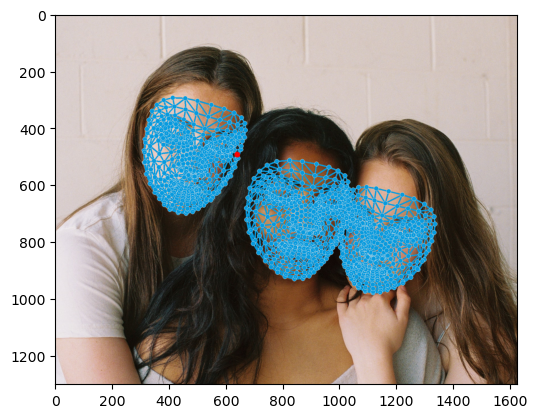

In [23]:
# 画出关键点
# circle函数是画圆的函数
img = cv2.circle(img, (x,y), 10, (0,0,255), -1)
look_img(img)

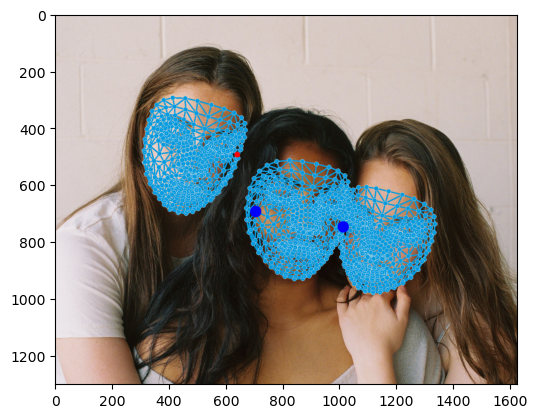

In [24]:
# 如法炮制画出缩引为1的脸的苹果机（123和352序号）
x = int(results.multi_face_landmarks[1].landmark[123].x * img_width)
y = int(results.multi_face_landmarks[1].landmark[123].y * img_height)
img = cv2.circle(img, (x,y), 20, (255,0,0), -1)

x = int(results.multi_face_landmarks[1].landmark[352].x * img_width)
y = int(results.multi_face_landmarks[1].landmark[352].y * img_height)
img = cv2.circle(img, (x,y), 20, (255,0,0), -1)

look_img(img)



In [ ]:
# 在3D空间中画出缩引为0的人脸
mp_drawing.plot_landmarks(results.multi_face_landmarks[0], mp_face_mesh.FACEMESH_CONTOURS)

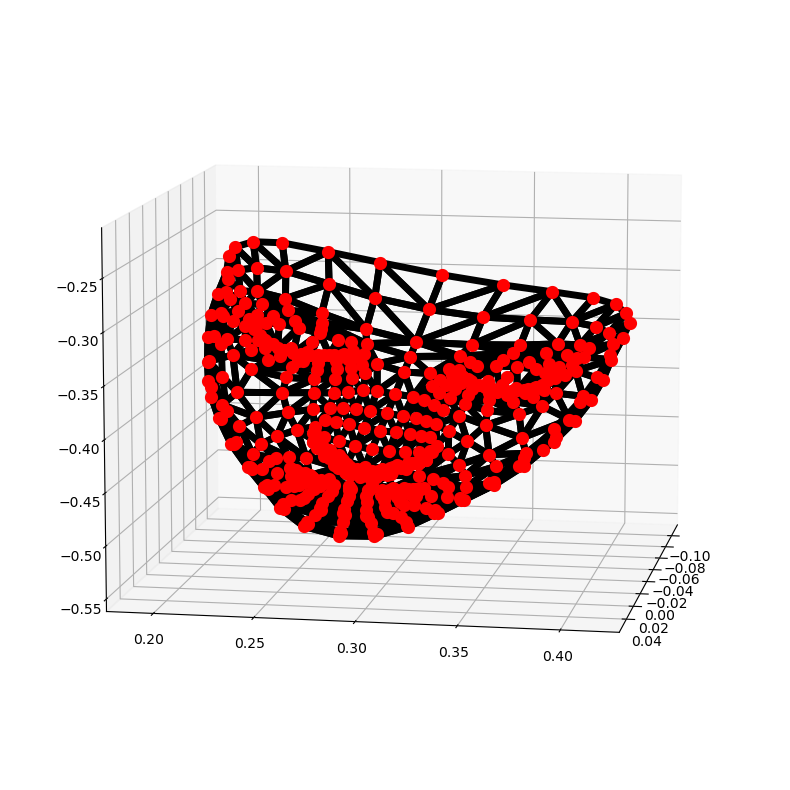

In [35]:
# 在3D空间中画出缩引为0的人脸
mp_drawing.plot_landmarks(results.multi_face_landmarks[0], mp_face_mesh.FACEMESH_TESSELATION)

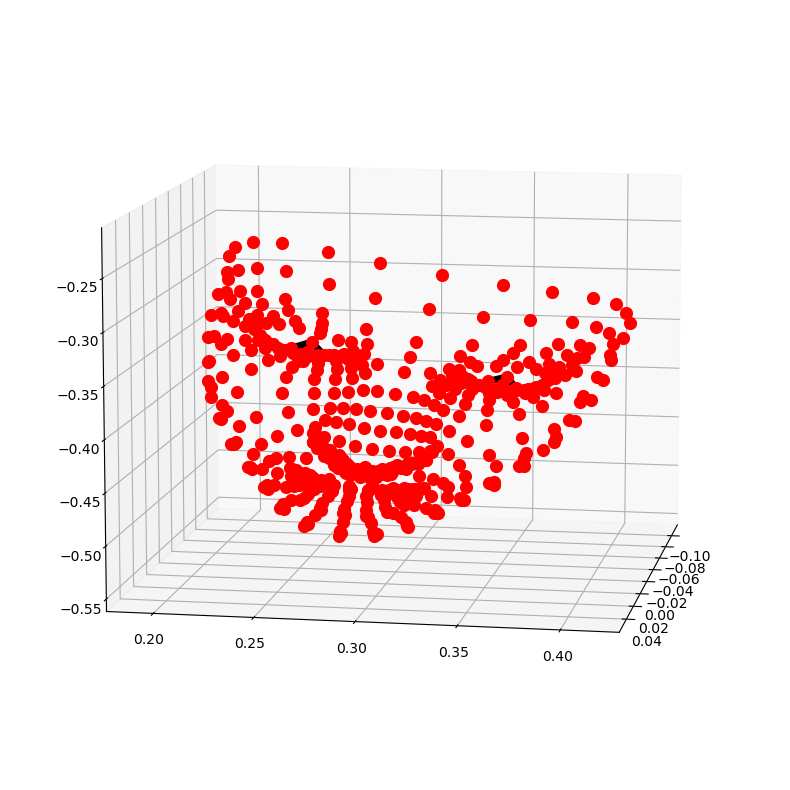

In [36]:
# 在3D空间中画出缩引为0的人脸
mp_drawing.plot_landmarks(results.multi_face_landmarks[0], mp_face_mesh.FACEMESH_IRISES)

利用Open3D实现交互式可视化

In [37]:
# 以缩引为0的人为例
# 获取关键点坐标
coords = np.array(results.multi_face_landmarks[0].landmark)

In [38]:
len(coords)

478

In [39]:
# 注意，这个coords结构很诡异，需要进一步处理
print(coords)

[x: 0.285185814
 y: 0.45976302
 z: -0.0142343119 x: 0.298652261
                  y: 0.434520364
                  z: -0.0435112  x: 0.294373035
                                 y: 0.439196646
                                 z: -0.0188308228 x: 0.299717814
                                                  y: 0.390233546
                                                  z: -0.040915858
 x: 0.301681846
 y: 0.423893481
 z: -0.0482866839 x: 0.305155516
                  y: 0.407055587
                  z: -0.0475714803 x: 0.313071668
                                   y: 0.361647367
                                   z: -0.033211749 x: 0.242126942
                                                   y: 0.324042886
                                                   z: -0.0114178155
 x: 0.32059741
 y: 0.326099813
 z: -0.0331895947 x: 0.324585
                  y: 0.310089886
                  z: -0.0383906439 x: 0.338474154
                                   y: 0.245551705
                   

In [40]:
coords[1].x

0.2986522614955902

In [41]:
# 在不用耗时循环的条件下，汇总所有点的xyz坐标
def get_x(each):
    return each.x
def get_y(each):
    return each.y
def get_z(each):
    return each.z

# 分别获取所有关键点的xyz坐标
points_x = np.array(list(map(get_x, coords)))
points_y = np.array(list(map(get_y, coords)))
points_z = np.array(list(map(get_z, coords)))

# 将xyz坐标合并
points = np.vstack([points_x, points_y, points_z]).T

# 查看points的形状
print(points.shape)

(478, 3)


In [42]:
print(points)

[[ 0.28518581  0.45976302 -0.01423431]
 [ 0.29865226  0.43452036 -0.0435112 ]
 [ 0.29437304  0.43919665 -0.01883082]
 ...
 [ 0.3604736   0.35907131  0.00222678]
 [ 0.35097331  0.36390004  0.00222678]
 [ 0.35539016  0.37375021  0.00222678]]


In [ ]:
# 使用Open3D可视化（不推荐，open3d与jupyter存在兼容性问题，容易导致jupyter无法正常打开）
# import cv2
# import open3d as o3d
# pcd = o3d.geometry.PointCloud()
# pcd.points = o3d.utility.Vector3dVector(points)
# o3d.visualization.draw_geometries([pcd])